

##  Support Vector Machines



This section is divided into 2 subsections.


*   In the first subsection, you will work on a synthetic dataset and visualize the boundary predicted by SVM. You will also vary the value of C-parameter and see how the decision boundary changes. **Please note that you cannot use inbuilt sklearn function for SVM in this sub-section**. You can only use a QCQP (Quadratically Constrained Quadratic Program) solver like CVXPY. 

  References which you may find helpful for this subsection: 
  
  1.   https://www.cvxpy.org/
  2.   https://www.cvxpy.org/examples/basic/quadratic_program.html

  Note that in this section you are expected to show how you derived the Quadratically Constrained form(which can be passed into the solver) from the basic principles of SVM algorithm
*  In the second subsection you will use be using the famous MNIST dataset to explore various kernels and report the results. **Please note you may use inbuilt sklearn SVM functions in this subsection**


In [2]:
!pip install numpy
!pip install matplotlib
!pip install cvxpy
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Subsection 1

In [29]:
# Helper function to visualize 2D points X with labels +1 or -1
def plot_points(X, Y):
    reds = []
    blues = []
    for i in range(Y.shape[0]):
        if Y[i] == 1:
            reds.append(X[i])
        else:
            blues.append(X[i])
    reds = np.array(reds)
    blues = np.array(blues)
    plt.scatter(reds[:, 0], reds[:, 1], c = 'r')
    plt.scatter(blues[:, 0], blues[:, 1], c = 'b')


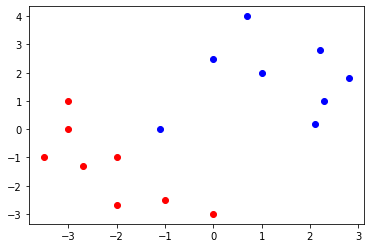

numpy.ndarray

In [4]:
# Create Synthetic Data and visualize the points
X = np.array([[-3.5, -1], [-3, 0], [-3, 1], [-2.7, -1.3], [-2, -1], [-2, -2.7], 
              [-1, -2.5], [0, -3], [-1.1, 0], [0, 2.5], [1, 2], [0.7, 4], 
              [2.1, 0.2], [2.3, 1], [2.8, 1.8], [2.2, 2.8]])
y = np.array([1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1])

def plot_graph(X,y):
  plot_points(X, y)
  plt.show()
plot_graph(X,y)
type(X)
type(y)


In the next cell you are required to find the Quadratic Constrained Quadratic form of SVM **without soft constraints** from the basic principles (check the svm slides uploaded in the portal). Start with the idea that SVM tries to maximize the margin and then derive the form which you can feed to the solver.

Please print the values of w, b. 

**Note: You are also required to upload a page of the derivation. You may also type it in markdown here**


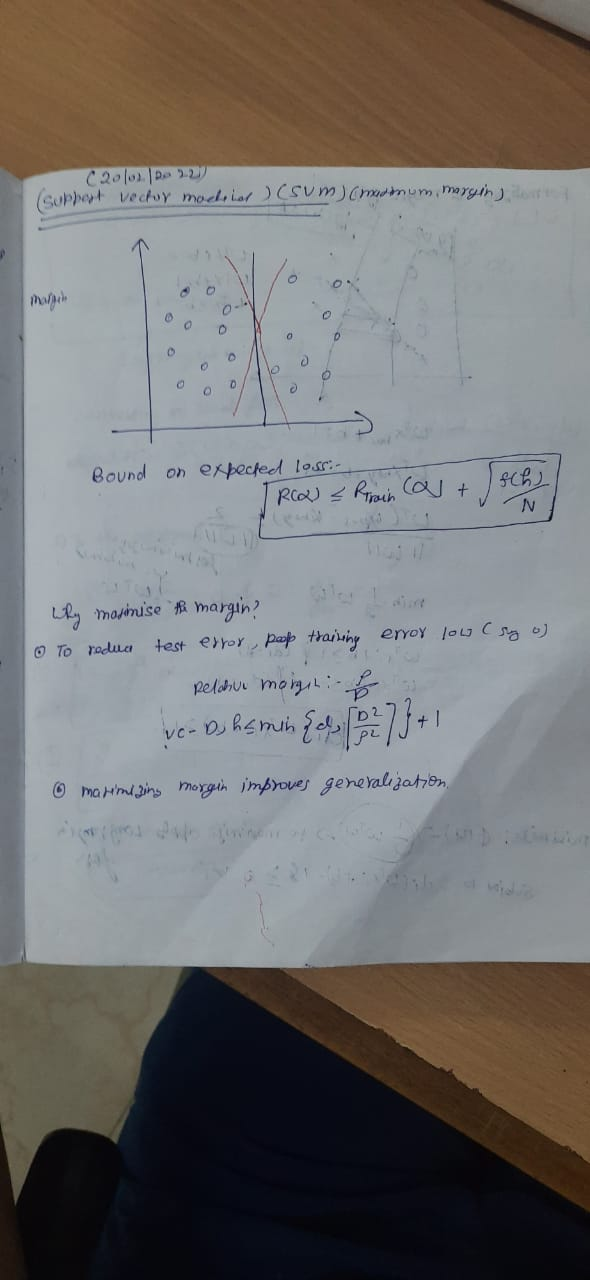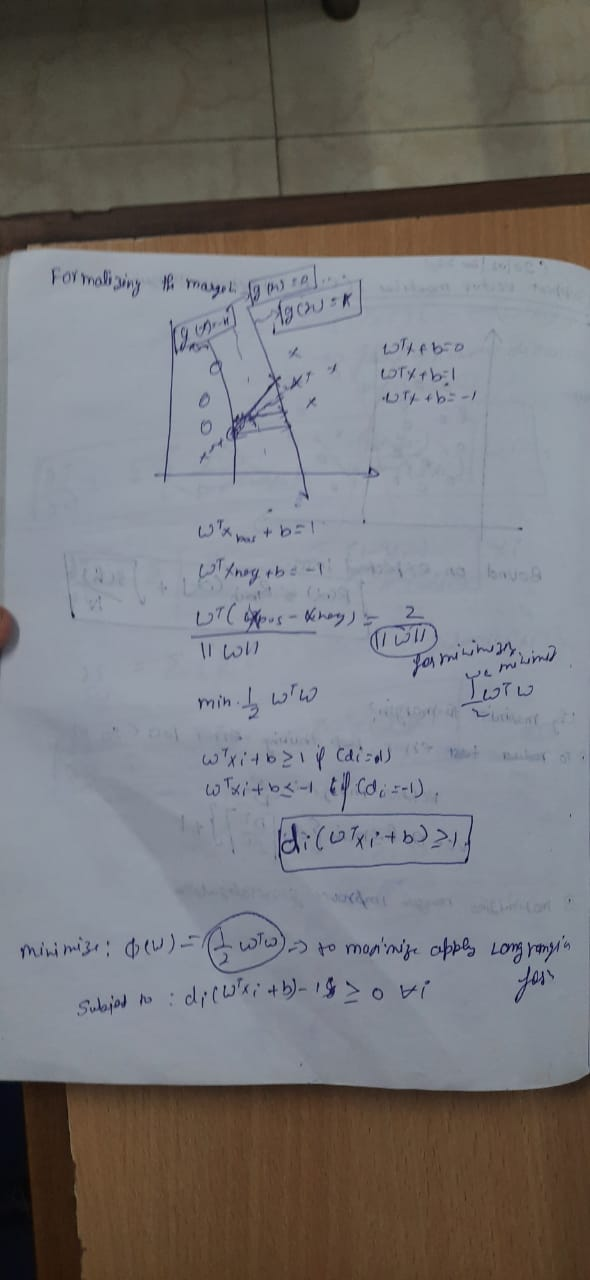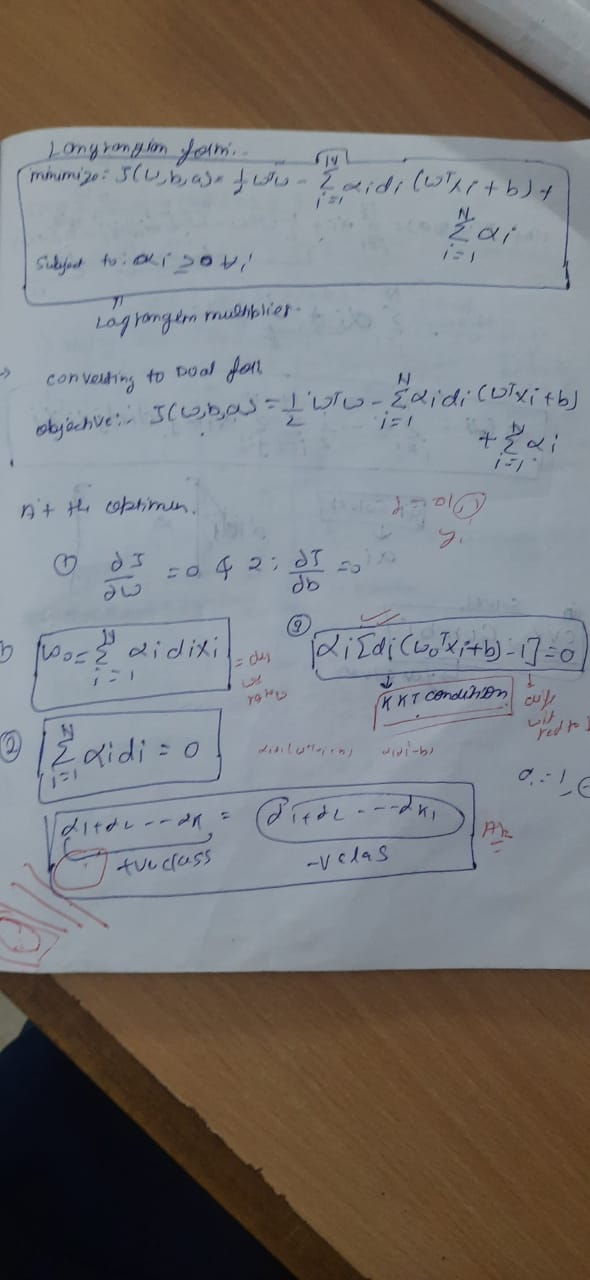

In [6]:
# Write your code here
def svm_fun(X,y):
  row,col=X.shape
  W_mat=cp.Variable(col)
  b=cp.Variable()
  obj=cp.Minimize(0.5*cp.square(cp.norm(W_mat)))
  temp=cp.matmul(X,W_mat)+b
  temp1=cp.multiply(y,temp)
  cons=[temp1-1>=0]

  sol=cp.Problem(obj,cons)
  sol.solve()
  sol.status
  print("W: ",W_mat.value)
  print("b: ",b.value)
  return W_mat,b
W_mat,b=svm_fun(X,y)

W:  [-1.73913043 -1.30434783]
b:  -2.9130434780347696


In the next cell you are required to visualize the boundary predicted by the solver. You may want to revise up on how to plot the a line given w, b. Please plot w vector as well as the margin lines.

Create a function to plot the line of separation as you would require this frequently in the subsequent parts of the assignment.

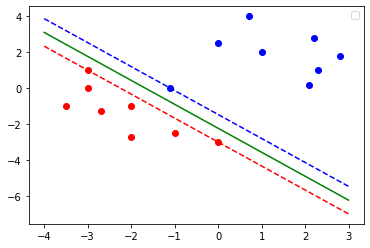

-1.7391304346957444


In [28]:
# Write your code here
def drawline(W_mat,b,X,y):
  x1_val=np.linspace(int(np.min(X, axis=0)[0]-1),int(np.max(X, axis=0)[0]+1),10)
  x2_val1=(-W_mat.value[0]* x1_val- b)/W_mat.value[1]
  x2_val2=(-W_mat.value[0]* x1_val- b-1)/W_mat.value[1]
  x2_val3=(-W_mat.value[0]* x1_val- b+1)/W_mat.value[1]
  # print(x2_val.value)
  # print(W_mat[0])
  plt.plot(x1_val, x2_val1.value,'g')
  plt.plot(x1_val, x2_val2.value,'b--')
  plt.plot(x1_val, x2_val3.value,'r--')
  plt.legend()
  plot_points(X, y)
  plt.show()
drawline(W_mat,b,X,y)
print(W_mat.value[0])


In the next cell add the following points:
* (-4, -10) with label 1
* (4, 4) with label -1

Is the decision boundary changed after adding the points? Plot it. Explain your observations theoretically.
No decision boundary will not change because the point is not present in the boundary added points are far away from the boundary

In [8]:
# Re-create the Synthetic Data by adding the points and visualize the points
# X.append([-4,-10])
row = np.array([-4,-10])
Xt=np.append(X,[row],axis=0)
yt = np.append(y,1)
row = np.array([4,4])
Xt=np.append(Xt,[row],axis=0)
yt = np.append(yt,-1)


values of X [[ -3.5  -1. ]
 [ -3.    0. ]
 [ -3.    1. ]
 [ -2.7  -1.3]
 [ -2.   -1. ]
 [ -2.   -2.7]
 [ -1.   -2.5]
 [  0.   -3. ]
 [ -1.1   0. ]
 [  0.    2.5]
 [  1.    2. ]
 [  0.7   4. ]
 [  2.1   0.2]
 [  2.3   1. ]
 [  2.8   1.8]
 [  2.2   2.8]
 [ -4.  -10. ]
 [  4.    4. ]]
values of y [ 1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1]


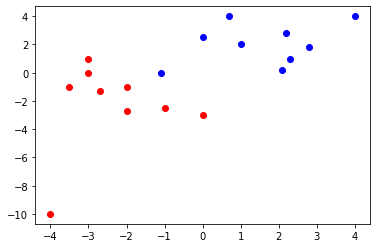

numpy.ndarray

In [9]:
print("values of X",Xt)
print("values of y",yt)
plot_graph(Xt,yt)
type(X)
# type(y)


W:  [-1.73913043 -1.30434783]
b:  -2.913043478291523


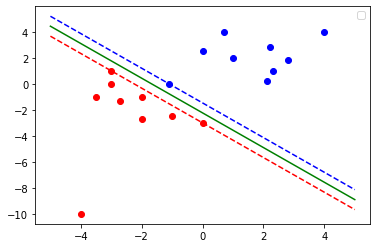

In [10]:
# Solve for the decision boundary using this modified dataset
W_matt,bt=svm_fun(Xt,yt)
drawline(W_matt,bt,Xt,yt)


In the next cell you are required to modify your framing of optimisation problem to incorporate soft constraints also known as slack. Plot the decision boundary, w and margin lines for various values of C: $0.01$, $0.1$, $3$, $10$, $100$.

Explain your results theoretically. How does the boundary change with varying values of C? Why?


The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points

**Note: Use the modified X and y i.e after adding points in previous cell**

In [11]:
def soft_svm_fun(X,y,c):
    row,col=X.shape
    print(row,col)
    W_mat=cp.Variable(col)
    b=cp.Variable()
    slack=cp.Variable(row)
    obj = cp.Minimize((0.5*cp.square(cp.norm(W_mat)))+c*cp.sum(slack))

    original_constraints = [y[i]*(W_mat.T @ X[i] + b)>=1-slack[i] for i in range(0,row)]
    slack_constraints = [slack[i]>=0for i in range(len(X))]

    constraints = original_constraints + slack_constraints

    problem = cp.Problem(obj, constraints)
    problem.solve()
    print(W_mat.value)
    print(b.value)
    
    return W_mat, b

18 2
[-0.22506809 -0.19858949]
0.013672204267370152


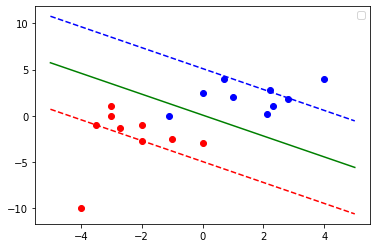

In [12]:
# Write your code here for C= 0.01
W_mattc,btc=soft_svm_fun(Xt,yt,0.01)
drawline(W_mattc,btc,Xt,yt)

18 2
[-0.38493724 -0.35146444]
-0.12133891201898916


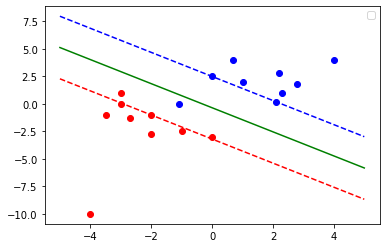

In [13]:
# Write your code here for C= 0.1
W_mattc,btc=soft_svm_fun(Xt,yt,0.1)
drawline(W_mattc,btc,Xt,yt)

18 2
[-1.73913043 -1.30434783]
-2.9130434782869634


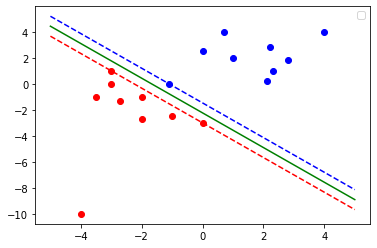

In [14]:
# Write your code here for C= 3
W_mattc,btc=soft_svm_fun(Xt,yt,3)
drawline(W_mattc,btc,Xt,yt)

18 2
[-1.73913043 -1.30434783]
-2.9130434783574235


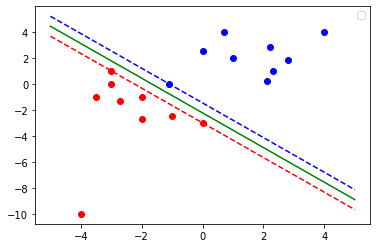

In [15]:
# Write your code here for C= 10
W_mattc,btc=soft_svm_fun(Xt,yt,10)
drawline(W_mattc,btc,Xt,yt)

18 2
[-1.73913044 -1.30434783]
-2.9130434786825745


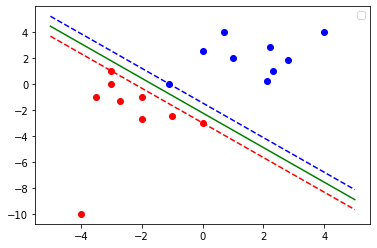

In [16]:
# Write your code here for C= 100
W_mattc,btc=soft_svm_fun(Xt,yt,100)
drawline(W_mattc,btc,Xt,yt)

Yes the boundary change with varying values of C when the value .

As the value of C increases the margin decreases thus Hard SVM. – If the values of C are very small the margin increases thus Soft SVM

Take the case of C = 100 and remove the support vectors. Does the boundary change after the deletion? Explain why?

18 2
[-1.73913044 -1.30434783]
-2.9130434786825745


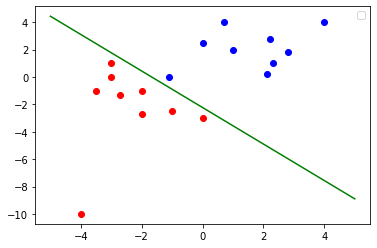

In [19]:
# Write your Code here
def drawline_remove(W_mat,b,X,y):
  x1_val=np.linspace(int(np.min(X, axis=0)[0]-1),int(np.max(X, axis=0)[0]+1),10)
  x2_val1=(-W_mat.value[0]* x1_val- b)/W_mat.value[1]
  # print(x2_val.value)
  # print(W_mat[0])
  plt.plot(x1_val, x2_val1.value,'g')
  plt.legend()
  plot_points(X, y)
  plt.show()
W_mattc,btc=soft_svm_fun(Xt,yt,100)
drawline_remove(W_mattc,btc,Xt,yt)

### Subsection 2

In [20]:
!pip install python-mnist
!rm -rf samples
!mkdir samples
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz -P samples/
!gunzip samples/train-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz -P samples/
!gunzip samples/train-labels-idx1-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz -P samples/
!gunzip samples/t10k-images-idx3-ubyte.gz
!wget http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz -P samples/
!gunzip samples/t10k-labels-idx1-ubyte.gz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2023-03-29 13:22:42--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘samples/train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  --.-KB/s    in 0.04s   

2023-03-29 13:22:42 (256 MB/s) - ‘samples/train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-03-29 13:22:43--  http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 104.21.29.36, 172.67.171.76, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|104.21.29.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Leng

In [21]:
# Import Relevant Packages
from sklearn.svm import SVC
import numpy as np
from mnist.loader import MNIST

In [22]:
mndata = MNIST('samples')

# Load training dataset
images, labels = mndata.load_training()
l = len(labels)
images_train = np.array(images)
labels_train = np.array(labels)

print(images_train.shape)
print(labels_train.shape)

(60000, 784)
(60000,)


In [23]:
# Load testing dataset
images, labels = mndata.load_testing()
l = len(labels)
images_test = np.array(images)
labels_test = np.array(labels)

print(images_test.shape)
print(labels_test.shape)

(10000, 784)
(10000,)


- Tweak different parameters like the C Parameter and gamma parameter of the Linear SVM and report the results.
- Experiment different kernels (Linear, Polynomial, RBF, Sigmoid) for classification and report the results.

Report accuracy score, F1-score, Confusion matrix and any other metrics you feel useful.

In [24]:
# use this subset of data for training and testing

batch = 3000
X_train = images_train[:batch,:]
y_train = labels_train[:batch]

X_test = images_test[batch:2*batch,:]
y_test = labels_test[batch:2*batch]

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pandas as pd

In [27]:
gamma=["auto", "scale"]
mnist_C=[0.01,0.1,3,10,100]
ker=[ "linear","poly", "sigmoid", "rbf"]

for gamma_val in gamma:
  for c_i in mnist_C:
    for ker_val in  ker:
        result_table=pd.DataFrame(columns = ["gamma","C Parameter","kernels","accuracy"])
        svclf=SVC(C=c_i, kernel = ker_val, gamma = gamma_val)
        svclf.fit(X_train, y_train)
        predy = svclf.predict(X_test)
        acr=accuracy_score(y_test,predy)
        Confusion_report = classification_report(y_test, predy)
        Confusion_matrix = confusion_matrix(y_test, predy)
        
        
        result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)
   
        display(result_table)
        print()
        print("Confusion_matrix")
        print(Confusion_matrix)
        print()
        print("Confusion_report")
        print(Confusion_report)
        print()
        print()
        


<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,auto,0.01,linear,0.889333



Confusion_matrix
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20]
 [  4   3   2  13   6  19   3   2 245   4]
 [  2   5   3   7  18   1   0  11   1 278]]

Confusion_report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,auto,0.01,poly,0.924



Confusion_matrix
[[287   2   1   0   0   2   4   0   1   0]
 [  0 340   1   3   0   0   2   0   0   0]
 [  0   7 291   3   3   0   1   5   1   1]
 [  0   5   3 255   0   5   0   4   4   3]
 [  1   2   2   0 252   0   4   1   0  19]
 [  2   6   0   4   0 245   2   1   3   2]
 [  6   1   2   0   6   2 273   0   0   0]
 [  0   9   6   0   4   0   1 272   1  10]
 [  4   1   1  10   5   8   2   4 264   2]
 [  2   5   1   3  16   1   0   4   1 293]]

Confusion_report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       297
           1       0.90      0.98      0.94       346
           2       0.94      0.93      0.94       312
           3       0.92      0.91      0.92       279
           4       0.88      0.90      0.89       281
           5       0.93      0.92      0.93       265
           6       0.94      0.94      0.94       290
           7       0.93      0.90      0.92       303
           8       0.96      0.88      0.92   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append

,gamma,C Parameter,kernels,accuracy
0,auto,0.01,sigmoid,0.115333



Confusion_matrix
[[  0 297   0   0   0   0   0   0   0   0]
 [  0 346   0   0   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 279   0   0   0   0   0   0   0   0]
 [  0 281   0   0   0   0   0   0   0   0]
 [  0 265   0   0   0   0   0   0   0   0]
 [  0 290   0   0   0   0   0   0   0   0]
 [  0 303   0   0   0   0   0   0   0   0]
 [  0 301   0   0   0   0   0   0   0   0]
 [  0 326   0   0   0   0   0   0   0   0]]

Confusion_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append

,gamma,C Parameter,kernels,accuracy
0,auto,0.01,rbf,0.115333



Confusion_matrix
[[  0 297   0   0   0   0   0   0   0   0]
 [  0 346   0   0   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 279   0   0   0   0   0   0   0   0]
 [  0 281   0   0   0   0   0   0   0   0]
 [  0 265   0   0   0   0   0   0   0   0]
 [  0 290   0   0   0   0   0   0   0   0]
 [  0 303   0   0   0   0   0   0   0   0]
 [  0 301   0   0   0   0   0   0   0   0]
 [  0 326   0   0   0   0   0   0   0   0]]

Confusion_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,auto,0.1,linear,0.889333



Confusion_matrix
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20]
 [  4   3   2  13   6  19   3   2 245   4]
 [  2   5   3   7  18   1   0  11   1 278]]

Confusion_report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,auto,0.1,poly,0.924



Confusion_matrix
[[287   2   1   0   0   2   4   0   1   0]
 [  0 340   1   3   0   0   2   0   0   0]
 [  0   7 291   3   3   0   1   5   1   1]
 [  0   5   3 255   0   5   0   4   4   3]
 [  1   2   2   0 252   0   4   1   0  19]
 [  2   6   0   4   0 245   2   1   3   2]
 [  6   1   2   0   6   2 273   0   0   0]
 [  0   9   6   0   4   0   1 272   1  10]
 [  4   1   1  10   5   8   2   4 264   2]
 [  2   5   1   3  16   1   0   4   1 293]]

Confusion_report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       297
           1       0.90      0.98      0.94       346
           2       0.94      0.93      0.94       312
           3       0.92      0.91      0.92       279
           4       0.88      0.90      0.89       281
           5       0.93      0.92      0.93       265
           6       0.94      0.94      0.94       290
           7       0.93      0.90      0.92       303
           8       0.96      0.88      0.92   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append

,gamma,C Parameter,kernels,accuracy
0,auto,0.1,sigmoid,0.115333



Confusion_matrix
[[  0 297   0   0   0   0   0   0   0   0]
 [  0 346   0   0   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 279   0   0   0   0   0   0   0   0]
 [  0 281   0   0   0   0   0   0   0   0]
 [  0 265   0   0   0   0   0   0   0   0]
 [  0 290   0   0   0   0   0   0   0   0]
 [  0 303   0   0   0   0   0   0   0   0]
 [  0 301   0   0   0   0   0   0   0   0]
 [  0 326   0   0   0   0   0   0   0   0]]

Confusion_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append

,gamma,C Parameter,kernels,accuracy
0,auto,0.1,rbf,0.115333



Confusion_matrix
[[  0 297   0   0   0   0   0   0   0   0]
 [  0 346   0   0   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 279   0   0   0   0   0   0   0   0]
 [  0 281   0   0   0   0   0   0   0   0]
 [  0 265   0   0   0   0   0   0   0   0]
 [  0 290   0   0   0   0   0   0   0   0]
 [  0 303   0   0   0   0   0   0   0   0]
 [  0 301   0   0   0   0   0   0   0   0]
 [  0 326   0   0   0   0   0   0   0   0]]

Confusion_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,auto,3,linear,0.889333



Confusion_matrix
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20]
 [  4   3   2  13   6  19   3   2 245   4]
 [  2   5   3   7  18   1   0  11   1 278]]

Confusion_report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,auto,3,poly,0.924



Confusion_matrix
[[287   2   1   0   0   2   4   0   1   0]
 [  0 340   1   3   0   0   2   0   0   0]
 [  0   7 291   3   3   0   1   5   1   1]
 [  0   5   3 255   0   5   0   4   4   3]
 [  1   2   2   0 252   0   4   1   0  19]
 [  2   6   0   4   0 245   2   1   3   2]
 [  6   1   2   0   6   2 273   0   0   0]
 [  0   9   6   0   4   0   1 272   1  10]
 [  4   1   1  10   5   8   2   4 264   2]
 [  2   5   1   3  16   1   0   4   1 293]]

Confusion_report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       297
           1       0.90      0.98      0.94       346
           2       0.94      0.93      0.94       312
           3       0.92      0.91      0.92       279
           4       0.88      0.90      0.89       281
           5       0.93      0.92      0.93       265
           6       0.94      0.94      0.94       290
           7       0.93      0.90      0.92       303
           8       0.96      0.88      0.92   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append

,gamma,C Parameter,kernels,accuracy
0,auto,3,sigmoid,0.115333



Confusion_matrix
[[  0 297   0   0   0   0   0   0   0   0]
 [  0 346   0   0   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 279   0   0   0   0   0   0   0   0]
 [  0 281   0   0   0   0   0   0   0   0]
 [  0 265   0   0   0   0   0   0   0   0]
 [  0 290   0   0   0   0   0   0   0   0]
 [  0 303   0   0   0   0   0   0   0   0]
 [  0 301   0   0   0   0   0   0   0   0]
 [  0 326   0   0   0   0   0   0   0   0]]

Confusion_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append

,gamma,C Parameter,kernels,accuracy
0,auto,3,rbf,0.115333



Confusion_matrix
[[  0 297   0   0   0   0   0   0   0   0]
 [  0 346   0   0   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 279   0   0   0   0   0   0   0   0]
 [  0 281   0   0   0   0   0   0   0   0]
 [  0 265   0   0   0   0   0   0   0   0]
 [  0 290   0   0   0   0   0   0   0   0]
 [  0 303   0   0   0   0   0   0   0   0]
 [  0 301   0   0   0   0   0   0   0   0]
 [  0 326   0   0   0   0   0   0   0   0]]

Confusion_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,auto,10,linear,0.889333



Confusion_matrix
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20]
 [  4   3   2  13   6  19   3   2 245   4]
 [  2   5   3   7  18   1   0  11   1 278]]

Confusion_report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,auto,10,poly,0.924



Confusion_matrix
[[287   2   1   0   0   2   4   0   1   0]
 [  0 340   1   3   0   0   2   0   0   0]
 [  0   7 291   3   3   0   1   5   1   1]
 [  0   5   3 255   0   5   0   4   4   3]
 [  1   2   2   0 252   0   4   1   0  19]
 [  2   6   0   4   0 245   2   1   3   2]
 [  6   1   2   0   6   2 273   0   0   0]
 [  0   9   6   0   4   0   1 272   1  10]
 [  4   1   1  10   5   8   2   4 264   2]
 [  2   5   1   3  16   1   0   4   1 293]]

Confusion_report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       297
           1       0.90      0.98      0.94       346
           2       0.94      0.93      0.94       312
           3       0.92      0.91      0.92       279
           4       0.88      0.90      0.89       281
           5       0.93      0.92      0.93       265
           6       0.94      0.94      0.94       290
           7       0.93      0.90      0.92       303
           8       0.96      0.88      0.92   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append

,gamma,C Parameter,kernels,accuracy
0,auto,10,sigmoid,0.115333



Confusion_matrix
[[  0 297   0   0   0   0   0   0   0   0]
 [  0 346   0   0   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 279   0   0   0   0   0   0   0   0]
 [  0 281   0   0   0   0   0   0   0   0]
 [  0 265   0   0   0   0   0   0   0   0]
 [  0 290   0   0   0   0   0   0   0   0]
 [  0 303   0   0   0   0   0   0   0   0]
 [  0 301   0   0   0   0   0   0   0   0]
 [  0 326   0   0   0   0   0   0   0   0]]

Confusion_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append

,gamma,C Parameter,kernels,accuracy
0,auto,10,rbf,0.115333



Confusion_matrix
[[  0 297   0   0   0   0   0   0   0   0]
 [  0 346   0   0   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 279   0   0   0   0   0   0   0   0]
 [  0 281   0   0   0   0   0   0   0   0]
 [  0 265   0   0   0   0   0   0   0   0]
 [  0 290   0   0   0   0   0   0   0   0]
 [  0 303   0   0   0   0   0   0   0   0]
 [  0 301   0   0   0   0   0   0   0   0]
 [  0 326   0   0   0   0   0   0   0   0]]

Confusion_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,auto,100,linear,0.889333



Confusion_matrix
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20]
 [  4   3   2  13   6  19   3   2 245   4]
 [  2   5   3   7  18   1   0  11   1 278]]

Confusion_report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,auto,100,poly,0.924



Confusion_matrix
[[287   2   1   0   0   2   4   0   1   0]
 [  0 340   1   3   0   0   2   0   0   0]
 [  0   7 291   3   3   0   1   5   1   1]
 [  0   5   3 255   0   5   0   4   4   3]
 [  1   2   2   0 252   0   4   1   0  19]
 [  2   6   0   4   0 245   2   1   3   2]
 [  6   1   2   0   6   2 273   0   0   0]
 [  0   9   6   0   4   0   1 272   1  10]
 [  4   1   1  10   5   8   2   4 264   2]
 [  2   5   1   3  16   1   0   4   1 293]]

Confusion_report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       297
           1       0.90      0.98      0.94       346
           2       0.94      0.93      0.94       312
           3       0.92      0.91      0.92       279
           4       0.88      0.90      0.89       281
           5       0.93      0.92      0.93       265
           6       0.94      0.94      0.94       290
           7       0.93      0.90      0.92       303
           8       0.96      0.88      0.92   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append

,gamma,C Parameter,kernels,accuracy
0,auto,100,sigmoid,0.115333



Confusion_matrix
[[  0 297   0   0   0   0   0   0   0   0]
 [  0 346   0   0   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 279   0   0   0   0   0   0   0   0]
 [  0 281   0   0   0   0   0   0   0   0]
 [  0 265   0   0   0   0   0   0   0   0]
 [  0 290   0   0   0   0   0   0   0   0]
 [  0 303   0   0   0   0   0   0   0   0]
 [  0 301   0   0   0   0   0   0   0   0]
 [  0 326   0   0   0   0   0   0   0   0]]

Confusion_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append

,gamma,C Parameter,kernels,accuracy
0,auto,100,rbf,0.115333



Confusion_matrix
[[  0 297   0   0   0   0   0   0   0   0]
 [  0 346   0   0   0   0   0   0   0   0]
 [  0 312   0   0   0   0   0   0   0   0]
 [  0 279   0   0   0   0   0   0   0   0]
 [  0 281   0   0   0   0   0   0   0   0]
 [  0 265   0   0   0   0   0   0   0   0]
 [  0 290   0   0   0   0   0   0   0   0]
 [  0 303   0   0   0   0   0   0   0   0]
 [  0 301   0   0   0   0   0   0   0   0]
 [  0 326   0   0   0   0   0   0   0   0]]

Confusion_report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       297
           1       0.12      1.00      0.21       346
           2       0.00      0.00      0.00       312
           3       0.00      0.00      0.00       279
           4       0.00      0.00      0.00       281
           5       0.00      0.00      0.00       265
           6       0.00      0.00      0.00       290
           7       0.00      0.00      0.00       303
           8       0.00      0.00      0.00   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,0.01,linear,0.889333



Confusion_matrix
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20]
 [  4   3   2  13   6  19   3   2 245   4]
 [  2   5   3   7  18   1   0  11   1 278]]

Confusion_report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,0.01,poly,0.375



Confusion_matrix
[[171 121   0   0   2   0   3   0   0   0]
 [  0 346   0   0   0   0   0   0   0   0]
 [  0 196 110   3   1   0   0   1   1   0]
 [  0 163   2 113   0   0   0   1   0   0]
 [  0 184   0   0  95   0   2   0   0   0]
 [  0 206   0  22   2  34   1   0   0   0]
 [  0 176   1   0   4   0 109   0   0   0]
 [  0 196   0   0   1   0   0 106   0   0]
 [  3 201   0  30   8   3   3  13  40   0]
 [  0 217   1   1  93   0   0  13   0   1]]

Confusion_report
              precision    recall  f1-score   support

           0       0.98      0.58      0.73       297
           1       0.17      1.00      0.29       346
           2       0.96      0.35      0.52       312
           3       0.67      0.41      0.50       279
           4       0.46      0.34      0.39       281
           5       0.92      0.13      0.23       265
           6       0.92      0.38      0.53       290
           7       0.79      0.35      0.49       303
           8       0.98      0.13      0.23   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append

,gamma,C Parameter,kernels,accuracy
0,scale,0.01,sigmoid,0.230667



Confusion_matrix
[[ 66  17   0   0  39   0  23 152   0   0]
 [  0 346   0   0   0   0   0   0   0   0]
 [  0 226   1   0  53   0   0  32   0   0]
 [  0 243   0   5   6   0   3  22   0   0]
 [  0  80   0   0  19   0   0 182   0   0]
 [  0 127   0   3  54   0   3  78   0   0]
 [  0  79   0   0 167   0  11  33   0   0]
 [  0  59   0   0   0   0   0 244   0   0]
 [  0 231   0   0  24   0   1  45   0   0]
 [  0  43   0   0   2   0   0 281   0   0]]

Confusion_report
              precision    recall  f1-score   support

           0       1.00      0.22      0.36       297
           1       0.24      1.00      0.39       346
           2       1.00      0.00      0.01       312
           3       0.62      0.02      0.03       279
           4       0.05      0.07      0.06       281
           5       0.00      0.00      0.00       265
           6       0.27      0.04      0.07       290
           7       0.23      0.81      0.36       303
           8       0.00      0.00      0.00   

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append

,gamma,C Parameter,kernels,accuracy
0,scale,0.01,rbf,0.205333



Confusion_matrix
[[ 10  14   0   0  80   0   0 193   0   0]
 [  0 346   0   0   0   0   0   0   0   0]
 [  0 205   1   0  50   0   0  56   0   0]
 [  0 196   0   0  24   0   0  59   0   0]
 [  0  82   0   0   9   0   0 190   0   0]
 [  0 111   0   0  50   0   0 104   0   0]
 [  0  74   0   0 148   0   2  66   0   0]
 [  0  55   0   0   0   0   0 248   0   0]
 [  0 205   0   0  28   0   0  68   0   0]
 [  0  35   0   0   2   0   0 289   0   0]]

Confusion_report
              precision    recall  f1-score   support

           0       1.00      0.03      0.07       297
           1       0.26      1.00      0.41       346
           2       1.00      0.00      0.01       312
           3       0.00      0.00      0.00       279
           4       0.02      0.03      0.03       281
           5       0.00      0.00      0.00       265
           6       1.00      0.01      0.01       290
           7       0.19      0.82      0.31       303
           8       0.00      0.00      0.00   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,0.1,linear,0.889333



Confusion_matrix
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20]
 [  4   3   2  13   6  19   3   2 245   4]
 [  2   5   3   7  18   1   0  11   1 278]]

Confusion_report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,0.1,poly,0.806333



Confusion_matrix
[[242  21   0   0   3  28   2   1   0   0]
 [  0 343   1   2   0   0   0   0   0   0]
 [  0  44 249   2   6   1   0   8   2   0]
 [  1  39   2 200   1  27   0   4   3   2]
 [  1  21   1   0 244   0   3   0   0  11]
 [  1  29   0   3   4 219   2   2   1   4]
 [  3  27   3   0  15  11 231   0   0   0]
 [  0  38   5   0   5   0   1 234   1  19]
 [  6  33   3  10  14  15   1   3 205  11]
 [  0  15   0   3  49   4   0   3   0 252]]

Confusion_report
              precision    recall  f1-score   support

           0       0.95      0.81      0.88       297
           1       0.56      0.99      0.72       346
           2       0.94      0.80      0.86       312
           3       0.91      0.72      0.80       279
           4       0.72      0.87      0.78       281
           5       0.72      0.83      0.77       265
           6       0.96      0.80      0.87       290
           7       0.92      0.77      0.84       303
           8       0.97      0.68      0.80   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,0.1,sigmoid,0.828667



Confusion_matrix
[[288   0   0   1   0   6   2   0   0   0]
 [  0 339   1   2   0   3   1   0   0   0]
 [  0  15 251  13   5   0   4   9  14   1]
 [  4   3   8 231   2  17   1   5   4   4]
 [  1   4   2   0 236   1   6   1   0  30]
 [  6   6   1  42   6 187   4   3   3   7]
 [  8   3  17   0   7  10 244   0   1   0]
 [  2  17   6   0   4   0   1 248   2  23]
 [  5  10   2  19   3  15   8   5 218  16]
 [  5   5   6   6  43   2   0  15   0 244]]

Confusion_report
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       297
           1       0.84      0.98      0.91       346
           2       0.85      0.80      0.83       312
           3       0.74      0.83      0.78       279
           4       0.77      0.84      0.80       281
           5       0.78      0.71      0.74       265
           6       0.90      0.84      0.87       290
           7       0.87      0.82      0.84       303
           8       0.90      0.72      0.80   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,0.1,rbf,0.871667



Confusion_matrix
[[281   0   1   0   2  10   2   0   1   0]
 [  0 339   1   2   0   3   1   0   0   0]
 [  0   5 277   7   4   0   2   9   8   0]
 [  3   2   5 243   2  16   0   5   1   2]
 [  1   2   2   0 245   0   5   1   0  25]
 [  1   1   0  10   3 240   3   1   2   4]
 [  5   1  11   0  11  10 252   0   0   0]
 [  1  13   6   0   8   0   1 246   2  26]
 [  2   3   5  18   6  12   3   4 238  10]
 [  2   5   4   4  48   2   0   7   0 254]]

Confusion_report
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       297
           1       0.91      0.98      0.95       346
           2       0.89      0.89      0.89       312
           3       0.86      0.87      0.86       279
           4       0.74      0.87      0.80       281
           5       0.82      0.91      0.86       265
           6       0.94      0.87      0.90       290
           7       0.90      0.81      0.85       303
           8       0.94      0.79      0.86   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,3,linear,0.889333



Confusion_matrix
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20]
 [  4   3   2  13   6  19   3   2 245   4]
 [  2   5   3   7  18   1   0  11   1 278]]

Confusion_report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,3,poly,0.926



Confusion_matrix
[[287   2   1   0   0   1   4   1   1   0]
 [  0 342   1   2   0   0   1   0   0   0]
 [  1   6 290   4   1   0   1   6   2   1]
 [  0   6   5 252   0   6   0   4   6   0]
 [  1   2   2   0 257   0   4   1   0  14]
 [  2   5   0   5   0 242   3   2   4   2]
 [  5   1   2   0   6   2 274   0   0   0]
 [  0  10   5   0   4   0   1 268   1  14]
 [  2   1   1   7   3   8   1   3 273   2]
 [  1   6   0   5  16   1   0   3   1 293]]

Confusion_report
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       297
           1       0.90      0.99      0.94       346
           2       0.94      0.93      0.94       312
           3       0.92      0.90      0.91       279
           4       0.90      0.91      0.90       281
           5       0.93      0.91      0.92       265
           6       0.95      0.94      0.95       290
           7       0.93      0.88      0.91       303
           8       0.95      0.91      0.93   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,3,sigmoid,0.817333



Confusion_matrix
[[275   0   4   0   0  12   4   0   2   0]
 [  0 338   0   3   0   3   1   0   1   0]
 [  5   6 264   8   4   7   4   4  10   0]
 [  6   3  11 200   0  48   0   4   5   2]
 [  3   2   2   0 243   2   6   1   1  21]
 [  9   4   1  40   3 182   1   1  21   3]
 [  9   0  12   0   8  17 242   0   2   0]
 [  4   9  11   4   3   3   1 253   2  13]
 [  5  12   7  12   7  27   1   2 211  17]
 [  8   3   5   4  34   7   0  16   5 244]]

Confusion_report
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       297
           1       0.90      0.98      0.93       346
           2       0.83      0.85      0.84       312
           3       0.74      0.72      0.73       279
           4       0.80      0.86      0.83       281
           5       0.59      0.69      0.64       265
           6       0.93      0.83      0.88       290
           7       0.90      0.83      0.87       303
           8       0.81      0.70      0.75   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,3,rbf,0.938



Confusion_matrix
[[292   0   1   1   1   0   0   1   1   0]
 [  0 340   1   2   0   0   2   1   0   0]
 [  0   0 298   4   3   0   1   3   3   0]
 [  2   1   4 256   0   7   0   4   3   2]
 [  1   0   1   0 265   0   3   1   0  10]
 [  2   1   0   6   0 247   3   1   3   2]
 [  7   0   3   0   2   2 276   0   0   0]
 [  0   6   4   1   5   0   0 269   2  16]
 [  0   1   2   5   3   6   2   3 275   4]
 [  2   3   1   5  12   1   0   5   1 296]]

Confusion_report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       297
           1       0.97      0.98      0.97       346
           2       0.95      0.96      0.95       312
           3       0.91      0.92      0.92       279
           4       0.91      0.94      0.93       281
           5       0.94      0.93      0.94       265
           6       0.96      0.95      0.96       290
           7       0.93      0.89      0.91       303
           8       0.95      0.91      0.93   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,10,linear,0.889333



Confusion_matrix
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20]
 [  4   3   2  13   6  19   3   2 245   4]
 [  2   5   3   7  18   1   0  11   1 278]]

Confusion_report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,10,poly,0.923667



Confusion_matrix
[[287   2   1   0   0   1   4   1   1   0]
 [  0 341   1   2   0   0   2   0   0   0]
 [  1   4 290   4   3   0   1   6   2   1]
 [  0   5   2 254   0   5   0   4   8   1]
 [  1   1   2   0 254   0   4   1   0  18]
 [  2   8   1   5   0 239   2   2   4   2]
 [  6   1   2   0   6   3 272   0   0   0]
 [  0   9   6   0   5   0   1 271   1  10]
 [  2   1   1  10   4   8   1   3 269   2]
 [  2   5   1   3  16   1   0   3   1 294]]

Confusion_report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       297
           1       0.90      0.99      0.94       346
           2       0.94      0.93      0.94       312
           3       0.91      0.91      0.91       279
           4       0.88      0.90      0.89       281
           5       0.93      0.90      0.92       265
           6       0.95      0.94      0.94       290
           7       0.93      0.89      0.91       303
           8       0.94      0.89      0.92   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,10,sigmoid,0.791



Confusion_matrix
[[265   0   4   0   0  18   7   0   3   0]
 [  0 336   0   3   0   2   2   0   3   0]
 [  6   3 250  11   3   7   7   4  21   0]
 [  7   2  11 186   1  55   1   5  10   1]
 [  1   1   3   0 236   3   7   1   1  28]
 [  8   4   0  37   2 179   3   1  26   5]
 [  5   1  11   0   8  20 237   0   8   0]
 [  0  10  12   5   5   2   0 247   5  17]
 [  5   6   7  18   7  30   1   3 213  11]
 [  6   4   4   3  47   5   0  24   9 224]]

Confusion_report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       297
           1       0.92      0.97      0.94       346
           2       0.83      0.80      0.81       312
           3       0.71      0.67      0.69       279
           4       0.76      0.84      0.80       281
           5       0.56      0.68      0.61       265
           6       0.89      0.82      0.85       290
           7       0.87      0.82      0.84       303
           8       0.71      0.71      0.71   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,10,rbf,0.941333



Confusion_matrix
[[292   0   1   1   1   0   0   1   1   0]
 [  0 340   1   2   0   0   2   1   0   0]
 [  0   1 298   4   2   0   1   4   2   0]
 [  2   0   5 259   0   5   0   3   2   3]
 [  1   0   1   0 265   0   3   0   0  11]
 [  2   1   0   6   0 247   3   1   3   2]
 [  7   0   3   0   2   2 276   0   0   0]
 [  0   6   4   2   5   0   0 273   2  11]
 [  1   1   2   6   3   4   2   3 275   4]
 [  2   3   1   5  12   1   0   2   1 299]]

Confusion_report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       297
           1       0.97      0.98      0.97       346
           2       0.94      0.96      0.95       312
           3       0.91      0.93      0.92       279
           4       0.91      0.94      0.93       281
           5       0.95      0.93      0.94       265
           6       0.96      0.95      0.96       290
           7       0.95      0.90      0.92       303
           8       0.96      0.91      0.94   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,100,linear,0.889333



Confusion_matrix
[[288   0   4   0   1   1   1   1   1   0]
 [  0 339   1   2   0   1   2   1   0   0]
 [  3   5 286   6   4   0   1   4   3   0]
 [  3   2   8 237   0  18   0   3   5   3]
 [  1   1   5   0 250   0   3   1   0  20]
 [  3   2   1  14   1 226   2   3  11   2]
 [  6   0   8   0   7   6 260   2   1   0]
 [  0   4  10   5   2   0   1 259   2  20]
 [  4   3   2  13   6  19   3   2 245   4]
 [  2   5   3   7  18   1   0  11   1 278]]

Confusion_report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       297
           1       0.94      0.98      0.96       346
           2       0.87      0.92      0.89       312
           3       0.83      0.85      0.84       279
           4       0.87      0.89      0.88       281
           5       0.83      0.85      0.84       265
           6       0.95      0.90      0.92       290
           7       0.90      0.85      0.88       303
           8       0.91      0.81      0.86   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,100,poly,0.924



Confusion_matrix
[[287   2   1   0   0   2   4   0   1   0]
 [  0 340   1   3   0   0   2   0   0   0]
 [  0   7 291   3   3   0   1   5   1   1]
 [  0   5   3 255   0   5   0   4   4   3]
 [  1   2   2   0 252   0   4   1   0  19]
 [  2   6   0   4   0 245   2   1   3   2]
 [  6   1   2   0   6   2 273   0   0   0]
 [  0   9   6   0   4   0   1 272   1  10]
 [  4   1   1  10   5   8   2   4 264   2]
 [  2   5   1   3  16   1   0   4   1 293]]

Confusion_report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       297
           1       0.90      0.98      0.94       346
           2       0.94      0.93      0.94       312
           3       0.92      0.91      0.92       279
           4       0.88      0.90      0.89       281
           5       0.93      0.92      0.93       265
           6       0.94      0.94      0.94       290
           7       0.93      0.90      0.92       303
           8       0.96      0.88      0.92   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,100,sigmoid,0.768333



Confusion_matrix
[[261   0   6   0   1  17   3   0   7   2]
 [  0 334   0   3   0   6   1   0   2   0]
 [  7   8 239  15   3  10   5   4  20   1]
 [  7   2  11 177   1  60   1   6  12   2]
 [  0   2   4   0 228   7   7   4   1  28]
 [ 11   4   0  37   2 180   3   0  26   2]
 [  5   0  13   0  14  21 227   1   9   0]
 [  0  11  12   6   9   3   0 237   7  18]
 [  7   3   9  10   5  39   0   2 216  10]
 [  3   5   8   3  52  12   0  22  15 206]]

Confusion_report
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       297
           1       0.91      0.97      0.93       346
           2       0.79      0.77      0.78       312
           3       0.71      0.63      0.67       279
           4       0.72      0.81      0.77       281
           5       0.51      0.68      0.58       265
           6       0.92      0.78      0.85       290
           7       0.86      0.78      0.82       303
           8       0.69      0.72      0.70   

<ipython-input-27-a5467b3d6da9>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table=result_table.append({"gamma":gamma_val,"C Parameter":c_i,"kernels":ker_val,"accuracy":acr},ignore_index = True)


,gamma,C Parameter,kernels,accuracy
0,scale,100,rbf,0.941333



Confusion_matrix
[[292   0   1   1   1   0   0   1   1   0]
 [  0 340   1   2   0   0   2   1   0   0]
 [  0   1 298   4   2   0   1   4   2   0]
 [  2   0   5 259   0   5   0   3   2   3]
 [  1   0   1   0 265   0   3   0   0  11]
 [  2   1   0   6   0 247   3   1   3   2]
 [  7   0   3   0   2   2 276   0   0   0]
 [  0   6   4   2   5   0   0 273   2  11]
 [  1   1   2   6   3   4   2   3 275   4]
 [  2   3   1   5  12   1   0   2   1 299]]

Confusion_report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       297
           1       0.97      0.98      0.97       346
           2       0.94      0.96      0.95       312
           3       0.91      0.93      0.92       279
           4       0.91      0.94      0.93       281
           5       0.95      0.93      0.94       265
           6       0.96      0.95      0.96       290
           7       0.95      0.90      0.92       303
           8       0.96      0.91      0.94   